# Лабораторная работа 5. Логическая регрессия

## <a href="https://www.kaggle.com/datasets/sahistapatel96/bankadditionalfullcsv">Дополнительные банковские услуги</a>

### Описание набора данных:
Данные относятся к кампаниям прямого маркетинга (телефонным звонкам) португальского банковского учреждения. Цель классификации - предсказать, согласиться ли клиент на срочный депозит (значение y).

### Прилагающаяся информация:
Эти данные относятся к кампании прямого маркетинга, проводимой португальским банковским учреждением. Маркетинговые кампании основывались на телефонных звонках. Часто требовалось несколько контактов с одним и тем же клиентом, чтобы узнать, будет ли заключена сделка (банковский срочный депозит) ("да") или нет ("нет").

bank-additional-full.csv со всеми примерами (41188) и 20 входными данными, упорядоченными по дате (с мая 2008 по ноябрь 2010), что очень близко к данным, проанализированным в [Moro et al., 2014]

Самые маленькие наборы данных предоставляются для тестирования алгоритмов машинного обучения, требующих больших вычислительных затрат (например, SVM). Цель классификации - предсказать, согласится ли клиент (да/нет) на срочный депозит (значение y).

### Назначение набора данных и возможные модели:

#### Данные клиента:
1) age - <b>Целое</b> - возраст клиента
2) job - <b>Категориальное</b> - категория занятости (categorical: 'admin', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
3) marital - <b>Категориальное</b> - семейное положение ('divorced', 'married', 'single', 'unknown')
4) education - <b>Категориальное</b> - образование ('basic.4y', 'basic.6 y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
5) default - <b>Категориальное</b> - наличие кредита ('no','yes','unknown')
6) housing - <b>Категориальное</b> - наличие ипотеки ('no','yes','unknown')
7) loan - <b>Категориальное</b> - наличие "личного" займа ('no','yes','unknown')

#### Последняя связь с контактом в рамках текущей кампании:
8) contact - <b>Категориальное</b> - тип связи ('cellular','telephone')
9) month - <b>Категориальное</b> - месяц, когда был совершен последний звонок ('jan', 'feb', 'mar', …, 'nov', 'dec')
10) day_of_week - <b>Категориальное</b> - день недели, когда был совершен последний звонок('mon','tue','wed','thu','fri')
11) duration - <b>Целое</b> - длительность последнего звонка в секундах. <i>Примечание: этот атрибут сильно влияет на конечный результат (например, если duration=0, то y='no'). Однако длительность неизвестна до выполнения вызова. Кроме того, очевидно, что время известно после завершения вызова. Таким образом, эти исходные данные следует включать только для целей сравнения и от них следует отказаться, если цель состоит в том, чтобы получить реалистичную прогностическую модель.

#### Прочее:
12) campaign - <b>Целое</b> - количество звонков клиенту за время последней компании (включая последний звонок)
13) pdays - <b>Целое</b> - количество дней с последнего звонка клиенту в рамках данной кампании (999 - звонок клиенту в течение данной компании не осуществлялся)
14) previous - <b>Целое</b> - количество звонков до текущей кампании
15) poutcome - <b>Категориальное</b> - результат последней кампании ('failure','nonexistent','success')

#### Социальные и экономические данные:
16) emp.var.rate - <b>Целое</b> - коэффициент вариации занятости (квартальный показатель)
17) cons.price.idx: - <b>Целое</b> - индекс потребительских цен (показатель за месяц)
18) cons.conf.idx - <b>Целое</b> - индекс потребительского доверия (показатель за месяц)
19) euribor3m - <b>Целое</b> - euribor 3 months (показатель за день)
20) nr.employed - <b>Целое</b> - количество сотрудников (квартальный показатель)

#### Выходная переменная:
21) y - <b>Бинарное</b> (прим. на русском ближе всего подходит булевое) - решение клиента ('yes','no')

Загрузка библиотек и набора данных

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc("font", size=14)

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

data = pd.read_csv('banking.csv', header=0, delimiter=';')
data = data.dropna()

print(data.shape)
print(list(data.columns))

(4119, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


Вывод данных подтверждет, что набор состоит из записей о клиентах банка и содержит 41188 записей, состоящих из 21 поля:

In [11]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


Сгруппируем "basic.4y", "basic.9y" и "basic.6y". Назовем этот срез "Basic":

In [12]:
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

In [13]:
data['education'].unique()

array(['Basic', 'high.school', 'university.degree', 'professional.course',
       'unknown', 'illiterate'], dtype=object)

In [14]:
data['y'].value_counts()

y
no     3668
yes     451
Name: count, dtype: int64

In [16]:
count_no_sub = len(data[data['y'] == 'no'])
count_sub = len(data[data['y'] == 'yes'])
pct_of_no_sub = count_no_sub / (count_no_sub + count_sub)
pct_of_sub = count_sub / (count_no_sub + count_sub)

print("percentage of no subscription is: ", pct_of_no_sub * 100)
print("percentage of subscription is: ", pct_of_sub * 100)

percentage of no subscription is:  89.0507404709881
percentage of subscription is:  10.949259529011895


Получаем два значения:
без вклада — 89,0507404709881, 
со вкладом — 10.949259529011895

In [28]:
data.groupby('job').mean()

Из полученной таблицы можно сделать выводы:
* Cредний возраст среди пенсионеров - 62 года
* Наименьшее среднее количество дней с момента последнего контакта с клиентом наблюдается у студентов и пенсионеров
* Зачастую соглашаются на предложения банка именно студенты и пенсионеры, в то время как обслуживающий персонал и "синии воротнички" - отказываются

In [ ]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


* Средний возраст клиентов, открывших вклад, выше среднего возраста тех, кто этого не сделал
* Количество дней с последнего контакта с клиентом меньше у клиентов, открывших депозит
* Количество звонков за одну кампанию меньше у клиентов, которые открыли депозит

In [ ]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

for var in cat_vars:
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1 = data.join(cat_list)
    data = data1
cat_vars = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars = data.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]

In [ ]:
data_final = data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

Этот блок кода использует метод RFE из библиотеки scikit-learn для отбора признаков с использованием логистической регрессии. RFE - это техника, которая рекурсивно удаляет наименее значимые признаки и строит модель до достижения указанного количества признаков. В данном случае модель логистической регрессии выбирает лучшие и худшие в плане производительности признаки, а затем отбрасывает признак, рекурсивно рассматривая всё меньшие и меньшие их множества

In [34]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


data_final_vars = data_final.columns.values.tolist()

y = ['y']
X = [i for i in data_final_vars if i not in y]

logreg = LogisticRegression()

rfe = RFE(logreg, step=20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())

print(rfe.support_)
print(rfe.ranking_)

TypeError: __init__() takes 2 positional arguments but 3 were given

 Метод выбрал следующие признаки: "euribor3m", "job_blue-collar", "job_housemaid", "marital_unknown", "education_illiterate", "default_no", "default_unknown", "contact_cellular", "contact_telephone", "month_apr", "month_aug", "month_dec", "month_jul", "month_jun", "month_mar", "month_may", "month_nov", "month_oct", "poutcome_failure", "poutcome_success"

In [36]:
cols = ['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 

X = os_data_X[cols]
y = os_data_y['y']

logit_model = sm.Logit(y,X)
result = logit_model.fit()

print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.547516
         Iterations 7
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.210     
Dependent Variable:   y                 AIC:               56025.3883
Date:                 2024-03-24 20:30  BIC:               56166.8635
No. Observations:     51134             Log-Likelihood:    -27997.   
Df Model:             15                LL-Null:           -35443.   
Df Residuals:         51118             LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
euribor3m             0.1726   0.0055  31.1231 0.0000  0.1617  0.1835
job_blue-collar 

Краткий анализ полученной модели логистической регрессии:
1) Текущее значение функции: Текущее значение функции составляет 0.547516. Это значение может быть связано с функцией правдоподобия или другой метрикой, используемой в процессе оптимизации модели.
2) Итерации: Для достижения оптимальных параметров модели потребовалось 7 итераций.
3) Pseudo R-squared: Значение псевдо R-квадрата составляет 0.210. Это показатель объяснительной способности модели, который указывает на то, насколько хорошо модель объясняет изменчивость зависимой переменной.
4) AIC и BIC: AIC (информационный критерий Акаике) равен 56025.3883, а BIC (критерий Шеннона) равен 56166.8635. Эти критерии используются для сравнения моделей, где более низкие значения указывают на более предпочтительные модели.
5) Коэффициенты и p-значения: Для каждого выбранного признака выводятся их коэффициенты, стандартные ошибки, z-значения и p-значения. Эти статистики помогают определить влияние каждого признака на целевую переменную.
6) LLR p-value: Значение p-значения для LLR (likelihood ratio test) равно 0.0000. Это может указывать на статистическую значимость модели в целом.
7) Converged: Значение 1.0000 указывает на успешную сходимость модели.

Процесс отбора признаков помогает выявить ключевые факторы, влияющие на целевую переменную, что может быть полезно для принятия решений и понимания важности различных аспектов исследуемого явления.

Обогащение синтетическими данными через SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

os = SMOTE(random_state=0)
os_data_X, os_data_y = os.fit_resample(X_train, y_train)

os_data_X = pd.DataFrame(data=os_data_X, columns=X.columns)
os_data_y = pd.DataFrame(data=os_data_y, columns=['y'])

print("Length of oversampled data is ", len(os_data_X))
print("Number of no subscription in oversampled data", len(os_data_y[os_data_y['y'] == 0]))
print("Number of subscription", len(os_data_y[os_data_y['y'] == 1]))
print("Proportion of no subscription data in oversampled data is ", len(os_data_y[os_data_y['y'] == 0]) / len(os_data_X))
print("Proportion of subscription data in oversampled data is ", len(os_data_y[os_data_y['y'] == 1]) / len(os_data_X))

Length of oversampled data is  51134
Number of no subscription in oversampled data 25567
Number of subscription 25567
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


Исходя из полученных значений, можно сказать, что синтетически увеличилась подборка только для тренировочных данных, а следовательно и данные из этого набора не уйдут в обучающий набор

Обучение модели логистической регрессии

In [39]:
y_pred = logreg.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.83


In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      7666
           1       0.88      0.78      0.82      7675

    accuracy                           0.83     15341
   macro avg       0.84      0.83      0.83     15341
weighted avg       0.84      0.83      0.83     15341



Расчёт F-меры говорит нам, что 83% рекламируемых срочных депозитов из набора данных заинтересовали клиента

<i>Оценку F-beta можно понимать как взвешенное гармоническое среднее точности и полноты.</i>

<i>Точность — это доля верных положительных предсказаний от общего количества положительных предсказаний.</i>

<i>Полнота — это доля верных положительных предсказаний от общего количества реальных положительных классов в тестовом наборе.</i>

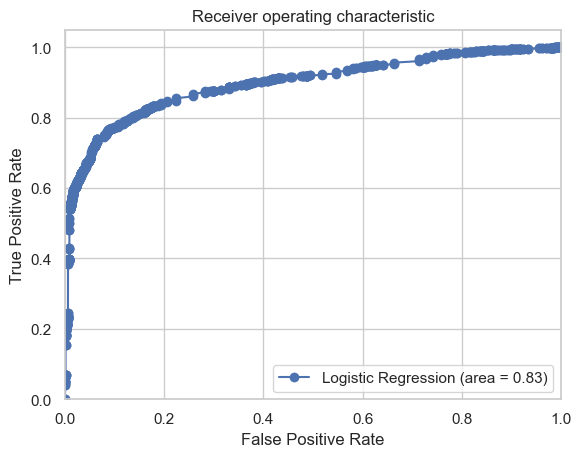

In [53]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

plt.figure()

plt.plot(fpr, tpr, 'bo-', label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.savefig('Log_ROC')
plt.show()

### Вывод: 
Логистическая регрессия - это статистический метод, используемый для моделирования вероятности возникновения некоторого события в зависимости от набора входных переменных. В отличие от обычной линейной регрессии, которая предсказывает непрерывные значения, логистическая регрессия предсказывает вероятность принадлежности к определенному классу. Она широко используется в задачах классификации, таких как прогнозирование болезни на основе медицинских признаков или определение категории покупателя на основе его поведения.
<br/>
<br/>ROC — другой распространённый в бинарной классификации инструмент. Восходящая прямая линия углового коэффициента 1 здесь представляет кривую рабочей характеристики приемника для чисто случайного классификатора, при этом график хорошего классификатора держится от восходящей прямой как можно дальше, к левому верхнему углу.